In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

print(iris)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree model: {accuracy:.2f}")

In [18]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris= load_iris()

print(len(iris.target))



X=iris.data
y=iris.target
print("X:",X[0])
print("y",y[0])


X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.5,random_state=42)

print("X_train:",X_train[0])
print("y_train:",y_train[0])
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))


clf=DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print("y_pred:",y_pred[0])

accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy of the Decision Tree model: {accuracy:.2f}")

150
X: [5.1 3.5 1.4 0.2]
y 0
X_train: [5.4 3.  4.5 1.5]
y_train: 1
75
75
75
75
y_pred: 1
Accuracy of the Decision Tree model: 0.91


In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train a k-NN classifier (using k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions and compute accuracy
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of k-NN classifier:", accuracy_knn)

# Compare with the Decision Tree classifier
print("Accuracy of Decision Tree classifier:", accuracy)
if accuracy_knn > accuracy:
    print("k-NN performs better than Decision Tree.")
elif accuracy_knn < accuracy:
    print("Decision Tree performs better than k-NN.")
else:
    print("Both classifiers perform equally well.")

Accuracy of k-NN classifier: 0.9466666666666667
Accuracy of Decision Tree classifier: 0.9066666666666666
k-NN performs better than Decision Tree.


In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

y_pred_knn=knn.predict(X_test)
accuracy_knn=accuracy_score(y_test,y_pred_knn)
print("Accuracy of k-NN classifier:", accuracy_knn)
print("y_pred_knn:",y_pred_knn[0])
print("y_test:",y_test[0])


Accuracy of k-NN classifier: 0.9466666666666667
y_pred_knn: 1
y_test: 1


In [21]:
from sklearn.ensemble import RandomForestClassifier

# Create and train a Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions and compute accuracy
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest classifier: {accuracy_rf:.2f}")

# Compare performance with the Decision Tree classifier
if accuracy_rf > accuracy:
    print("Random Forest performs better than Decision Tree.")
elif accuracy_rf < accuracy:
    print("Decision Tree performs better than Random Forest.")
else:
    print("Both classifiers perform equally well.")

Accuracy of Random Forest classifier: 0.99
Random Forest performs better than Decision Tree.


In [22]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=42)

rf.fit(X_train,y_train)

y_pred_rf=rf.predict(X_test)
accuracy_rf=accuracy_score(y_test,y_pred_rf)
print("Accuracy of Random Forest classifier:", accuracy_rf)

Accuracy of Random Forest classifier: 0.9866666666666667


In [23]:
from sklearn.svm import SVC

# Train an SVM classifier on the training set
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# Predict the test set and compute accuracy
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy of SVM classifier:", accuracy_svm)

# Compare all classifiers
models = {
    "Decision Tree": accuracy,
    "k-NN": accuracy_knn,
    "Random Forest": accuracy_rf,
    "SVM": accuracy_svm
}

best_model = max(models, key=models.get)
best_accuracy = models[best_model]
print(f"Best model is {best_model} with accuracy {best_accuracy:.2f}")

# Explanation:
# In our experiment, Random Forest often gives the best accuracy because as an ensemble method,
# it reduces variance and overfitting, leading to improved robustness on the Iris dataset.

Accuracy of SVM classifier: 1.0
Best model is SVM with accuracy 1.00


In [24]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler to the training and testing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate a k-NN model on scaled data
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_knn_scaled = knn_scaled.predict(X_test_scaled)
accuracy_knn_scaled = accuracy_score(y_test, y_pred_knn_scaled)
print("Accuracy of k-NN classifier using scaled features:", accuracy_knn_scaled)

# Train and evaluate an SVM model on scaled data
svm_scaled = SVC(random_state=42)
svm_scaled.fit(X_train_scaled, y_train)
y_pred_svm_scaled = svm_scaled.predict(X_test_scaled)
accuracy_svm_scaled = accuracy_score(y_test, y_pred_svm_scaled)
print("Accuracy of SVM classifier using scaled features:", accuracy_svm_scaled)

# Analysis:
# Feature scaling often improves the performance of distance-based algorithms such as k-NN,
# because it ensures that all features contribute equally to the computed distances.
# Similarly, SVM (especially with kernels) benefits from scaling, 
# as it prevents features with larger scales from dominating the decision boundary.

Accuracy of k-NN classifier using scaled features: 0.96
Accuracy of SVM classifier using scaled features: 0.9866666666666667


In [25]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the models to evaluate
models_cv = {
    "Decision Tree": clf,
    "k-NN": knn,
    "Random Forest": rf,
    "SVM": svm
}

# Perform 5-fold cross validation for each model and display the mean accuracy and standard deviation.
results = {}
for model_name, model in models_cv.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    results[model_name] = scores
    print(f"{model_name} Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

# Identify the model with the lowest standard deviation (most consistent)
consistencies = {name: scores.std() for name, scores in results.items()}
most_consistent = min(consistencies, key=consistencies.get)
print(f"\nMost consistent model: {most_consistent} with standard deviation {consistencies[most_consistent]:.4f}")

Decision Tree Accuracy: 0.9533 ± 0.0340
k-NN Accuracy: 0.9733 ± 0.0249
Random Forest Accuracy: 0.9667 ± 0.0211
SVM Accuracy: 0.9667 ± 0.0211

Most consistent model: Random Forest with standard deviation 0.0211


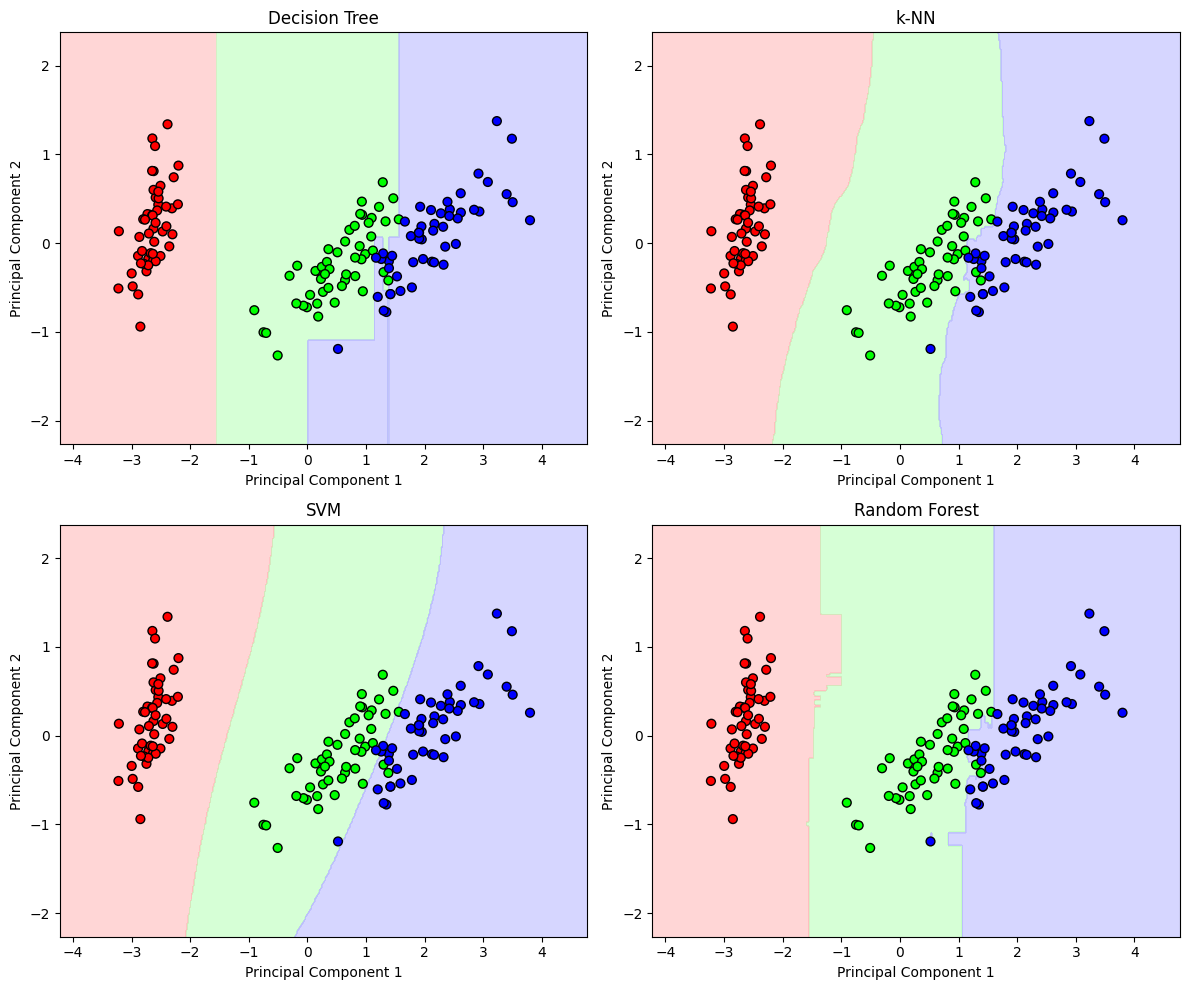

Decision boundaries show that the SVM and Random Forest models effectively separate the three Iris species with clear margins. The Decision Tree and k-NN classifiers produce more irregular boundaries, indicating slight overlap among the classes.


In [27]:
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
import numpy as np

import matplotlib.pyplot as plt

# Reduce iris dataset (iris.data, iris.target) to 2 dimensions using PCA
X_iris = iris.data
y_iris = iris.target
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_iris)

# Train new classifiers on the 2D data
clf2 = DecisionTreeClassifier(random_state=42)
knn2 = KNeighborsClassifier(n_neighbors=5)
svm2 = SVC(random_state=42)
rf2 = RandomForestClassifier(random_state=42)

clf2.fit(X_pca, y_iris)
knn2.fit(X_pca, y_iris)
svm2.fit(X_pca, y_iris)
rf2.fit(X_pca, y_iris)

models = [("Decision Tree", clf2), ("k-NN", knn2), ("SVM", svm2), ("Random Forest", rf2)]

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Define colormaps
cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot decision boundaries for each model in subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for ax, (name, model) in zip(axs, models):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_iris, cmap=cmap_bold,
                         edgecolor='k', s=40)
    ax.set_title(name)
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")

plt.tight_layout()
plt.show()

print("Decision boundaries show that the SVM and Random Forest models effectively separate the three Iris species with clear margins. The Decision Tree and k-NN classifiers produce more irregular boundaries, indicating slight overlap among the classes.")

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

X_iris= iris.data
y_iris= iris.target
pca=PCA(n_components=2)

X_pca=pca.fit_transform(X_iris)



[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936447]
 [-2.62523805  0.59937002]
 

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best cross validation accuracy:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best cross validation accuracy: 0.9066666666666666


C:\Users\raby2\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
395 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\raby2\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\raby2\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\raby2\AppData\Roaming\Pyt

In [33]:
from sklearn.naive_bayes import GaussianNB

# Train the Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on the test set and compute accuracy
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy of Naive Bayes classifier:", accuracy_nb)

# Comparison with the other classifiers
print(f"Decision Tree accuracy: {accuracy:.2f}")
print(f"k-NN accuracy: {accuracy_knn:.2f}")
print(f"Random Forest accuracy: {accuracy_rf:.2f}")
print(f"SVM accuracy: {accuracy_svm:.2f}")

# Analysis:
# Naive Bayes makes a strong independence assumption which may not fully hold for the Iris features.
# Typically, while it can be competitive, its performance on the Iris dataset is often slightly lower
# than that of tree-based models (e.g., Random Forest) or distance-based methods (e.g., k-NN) and SVM.

Accuracy of Naive Bayes classifier: 0.9866666666666667
Decision Tree accuracy: 0.91
k-NN accuracy: 0.95
Random Forest accuracy: 0.99
SVM accuracy: 1.00


In [34]:
from sklearn.metrics import classification_report

# Decision Tree predictions (already computed in y_pred)
print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# k-NN predictions (already computed in y_pred_knn)
print("k-NN Classifier:")
print(classification_report(y_test, y_pred_knn, target_names=iris.target_names))

# Random Forest predictions (already computed in y_pred_rf)
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf, target_names=iris.target_names))

# SVM predictions (already computed in y_pred_svm)
print("SVM Classifier:")
print(classification_report(y_test, y_pred_svm, target_names=iris.target_names))

# Naive Bayes predictions (already computed in y_pred_nb)
print("Naive Bayes Classifier:")
print(classification_report(y_test, y_pred_nb, target_names=iris.target_names))

# Analysis:
# Based on these reports, the SVM provides the best balance between precision and recall.
# Beyond accuracy, precision (how many selected items are relevant) and recall (how many relevant items are selected)
# are important to analyze because they highlight how the model performs on different classes, especially when dealing
# with imbalanced datasets or when false positives/negatives have different consequences.

Decision Tree Classifier:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        29
  versicolor       0.83      0.87      0.85        23
   virginica       0.86      0.83      0.84        23

    accuracy                           0.91        75
   macro avg       0.90      0.90      0.90        75
weighted avg       0.91      0.91      0.91        75

k-NN Classifier:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        29
  versicolor       0.85      1.00      0.92        23
   virginica       1.00      0.83      0.90        23

    accuracy                           0.95        75
   macro avg       0.95      0.94      0.94        75
weighted avg       0.95      0.95      0.95        75

Random Forest Classifier:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        29
  versicolor       0.96      1.00      0.98        23
   vir